<a href="https://colab.research.google.com/github/rajanchoksi79/pytorch_practice/blob/main/workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss | 0.48106518387794495 
Epoch 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss | 0.3463551998138428 
Epoch 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss | 0.21729660034179688 
Epoch 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss | 0.14464017748832703 
Epoch 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss | 0.11360953003168106 
Epoch 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss | 0.09919948130846024 
Epoch 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss | 0.08886633068323135 
Epoch 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss | 0.0805937647819519 
Epoch 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss | 0.07232122868299484 
Epoch 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss | 0.06473556160926819 


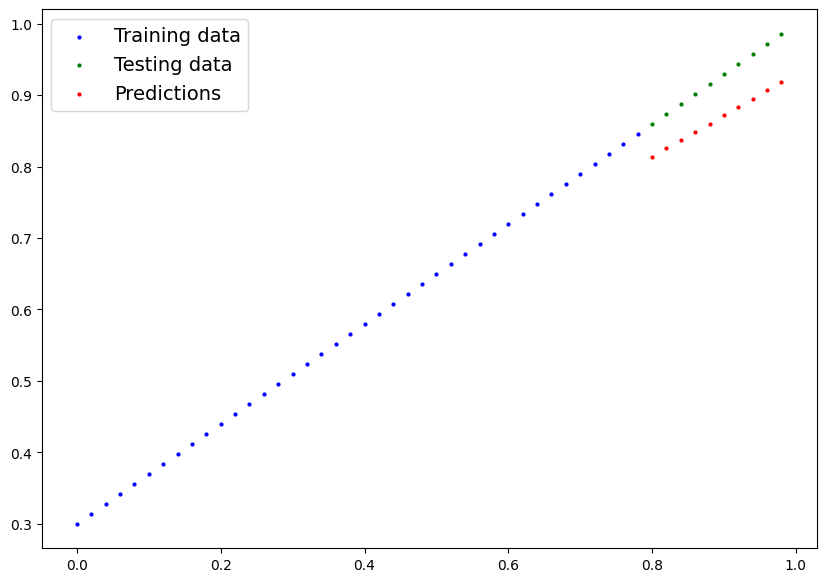

In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

# crerating training and testing data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

#visuling data
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))

  #plot training data into blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #plot testing data into green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

# plot_predictions()

# create a linear regression model class
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

torch.manual_seed(42)
model_0 = LinearRegressionModel()

with torch.inference_mode():
  y_pred = model_0(X_test)

# print(f"Number of testing samples: {len(X_test)}")
# print(f"Number of predictions made: {len(y_pred)}")
# print(f"Predicted values: \n{y_pred}")

# plot_predictions(predictions=y_pred)

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch {epoch} | MAE Train Loss: {loss} | MAE Test Loss | {test_loss} ")


model_0.state_dict()

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

plot_predictions(predictions=y_preds)